## BOOTCAMP ÖDEV-2 / HAFTA-5

### Q1: One hot encoding modelin görmediği veriye nasıl uygulanır?

Train-Test split yapılmadan önce tüm veriye One-Hot-Encoding uygulanabilir, böylece elimizdeki feature'ların tüm değerlerini korumuş oluruz. Ancak, sistem canlıya alındığında bu kategorik öznitelikler için farklı değerler gelebilir bu da kurduğumuz modelin hata vermesine neden olur. Bunu engellemek için gelen değeri elimizdeki değer listesinde aratıp eğer listede bulunmuyorsa yeni bir feature olarak tutabiliriz, bu fikri sorunsuzca uygulayabilmek için train setinde de fazladan bir kolon oluşturmamız gerekli (hatta her ana feature için unique değer sayısı + 1 kolon olmalı). Örneğin elimizde 'Meslek' özniteliği olsun ve datasetimizde feature'ın aldığı değerler = ['Öğretmen', 'Mühendis', 'Doktor'] olsun. Train-test ayrımı yapmadan OHE (one-hot-encoding) uygularsak model kurarken sorun yaşamayız. Kurduğumuz modeli canlıya aldığımızda gelen veride Meslek değeri 'Hakim' olursa daha önce böyle bir bilgiye sahip olmadığımızdan model çalışmaz. Bunun için OHE aşamasında Meslek feature'ını encodelarken 3+1 (len+1) yeni feature oluşturabiliriz, bu +1 feature'ı 'Other' olarak isimlendirebiliriz. En kötü senaryoda, elimizdeki tüm kategorik özniteliklerde daha önce görmediğimiz değerler gelebilir, bunun için de OHE aşamasında her öznitelik için aldığı unique değerler sayısı + 1 feature oluşturarak durumu idare edebiliriz. Yeni gördüğümüz değerler belli bir artış gösterdiğinde modeli güncelleyebiliriz. Sunduğum çözüm yolu ciddi boyut artışlarına sebep olur ve eklenen yeni sütunlarda çok fazla null değer bulunacaktır, OHE yerine Label Encoder kullanarak boyut artışından kaçınabiliriz, aynı şekilde modelin görmediği veriler Label Encoder için de sorun olacaktır, OHE için önerdiğim çözüm yolunu +1 feature oluşturmak yerine +1 class değeri oluşturarak çözebiliriz. Label Encoder ile Meslek feature'ı için class değerleri 'Doktor' = 0, 'Mühendis' = 1, 'Öğretmen' = 2, 'Other' = 3 olabilir.

### Q2: Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

Label Encoder, encoding işlemi yaparken feature değerlerini alfabetik sıralayarak numaralandırır, böylece kodu her çalıştırdığımızda aynı value için aynı encoding değerini görürüz. Alfabetik çalışma mantığını değiştirmek mümkündür, şöyle ki LabelEncoder okuduğu değerleri alfabetik sıralayarak le.classes_ ile tutar ve buradan index sırasına göre yazar. Eğer belirlediğimiz bir sıralama varsa, bu le.classes_ 'ı manipüle ederek kullanabiliriz. [örnek](https://stackoverflow.com/a/64336086/10380949)

Sıralamayı nasıl yapmamız gerektiğini bilmiyorsak, random şekilde (olabilecek her türlü olasılığı kapsayarak) le_classes'ı manipüle edip encoding yapabilir, daha sonrasında hedef özellik ile korelasyonlarına bakıp karşılaştırabiliriz. Korelasyonu en yüksek veren kombinasyonu kullanabiliriz.
Alternatif olarak, label encoding yaptığımız feature'ları da scale edebiliriz, böylece feature'lar arası kategori sayısı farkı ve feature içindeki değer ataması farkı azaltılabilir.

+ Q1 ile Q2'ye bakıldığında, Q1 case'i (modelin görmediği veriler) için LabelEncoder, Q2 case'i için OHE'yi daha avantajlı görüyorum.

### Q3: Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

SMOTE yöntemiyle verideki dengesizliği azaltmanın yanısıra, train-test split işleminde stratified metodunu kullanarak veriyi istatistiksel olarak dengeli ayırabiliriz. Fraud case'inden örnek vermek gerekirse, train sette 1 fraud başına 10 non-fraud sample düşüyorsa testte de benzer durum olmalıdır, bu da stratified parametresiyle sağlanabilir.

### Q4: Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

Veriyi önce train-test diye ayırıp, daha sonra train setini kullanmadan önce train-validation olarak ayırabiliriz.
Örnek sayımızın az olduğu durumlarda cross-validation, leave-one-out veya bootstrap metodlarını kullanmayı düşünebiliriz.
Unutulmamalıdır ki, modeli train'e hazırlarken yaptığımız her işlem (encoding,standardization vb.) validation ve test setlerinde de uygulanmalıdır.

### Q5: predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

predict_proba metoduyla, model fit edilirken verilerin hangi class'a ait olma olasılıklarını görebiliriz. Fraud örneği için fraud class'ını 1, non-fraud'u sıfır alırsak, 1'e yakın değerler o örneğin fraud olma olasılığının yüksek olduğunu gösterir (olasılıklar toplamının 1 olacağını unutmayalım). Metod vasıtasıyla eğittiğimiz tüm örneklerin olasılıklarını görebilir, bu olasılıkları inceleyip ortalamasını yahut medyanını hesaplayarak yeni bir threshold değeri oluşturabiliriz. Default olarak threshold değeri 0.5'tir, isteğe göre bu eşik düşürelebilir veya yükseltilebilir. 
[bknz](https://stackoverflow.com/a/50345409/10380949)

### Q6: Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

Kodları aşağıda bulabilirsiniz.

In [36]:
# gerekli kütüphaneler import edilir
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import random

In [37]:
# veri yüklenir ve manipüle edilerek eğitime hazırlanır

addr = r'C:\Users\Asus\Desktop\Bootcamp\auto_insurance_csv.csv'
df = pd.read_csv(addr)
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
    if (umb != '0.0') & (umb != '9999'):
        df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
    if (hobby != 'chess') & (hobby != 'cross-fit'):
        df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.


In [3]:
df1.head(10)

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000
5,2015-01-02,OH,MISSING,0.0,478456,FEMALE,PhD,tech-support,other,unmarried,...,Saab,95,2003,1,3004,False,36-40,251-300,medium,501-1000
6,2015-01-13,IN,MISSING,0.0,441716,MALE,PhD,prof-specialty,other,husband,...,Nissan,Pathfinder,2012,0,5336,False,31-35,101-150,medium,501-1000
7,2015-02-27,IL,MISSING,0.0,603195,MALE,Associate,tech-support,other,unmarried,...,Audi,A5,2015,0,9155,False,36-40,151-200,medium,501-1000
8,2015-01-30,IL,MISSING,0.0,601734,FEMALE,PhD,other-service,other,own-child,...,Toyota,Camry,2012,0,6568,False,31-35,0-50,medium,0-500
9,2015-01-05,IL,MISSING,9999,600983,MALE,PhD,priv-house-serv,other,wife,...,Saab,92x,1996,0,1260,False,41-45,201-250,medium,0-500


In [4]:
data.info() # işlenen datada null bulunmamaktadır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   incident_date                 1000 non-null   datetime64[ns]
 1   policy_state                  1000 non-null   object        
 2   policy_csl                    1000 non-null   object        
 3   umbrella_limit                1000 non-null   object        
 4   insured_zip                   1000 non-null   int64         
 5   insured_sex                   1000 non-null   object        
 6   insured_education_level       1000 non-null   object        
 7   insured_occupation            1000 non-null   object        
 8   insured_hobbies               1000 non-null   object        
 9   insured_relationship          1000 non-null   object        
 10  capital-gains                 1000 non-null   int64         
 11  capital-loss                  1

### data için gerekli manipülasyonlar yapıldı, model kurma aşamasına hazırlık için encoding, scaling, smote ve split işlemleri yapılacaktır

In [5]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
    df1[col] = df1[col].astype('object')

columns_to_encode = []
for col in df1.columns:
    if df1[col].dtype == 'object':
        columns_to_encode.append(col)

columns_to_encode # kategorik sütunlar encode edilmek üzere listelendi

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [6]:
df1.drop(["incident_date"], axis = 1, inplace = True) # örnekte train-test ayrımında kullanmıştık ama ben kullanmadım
df1.head()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,53300,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,0,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,35100,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,48900,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,66000,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000


In [7]:
# Label Encoding işlemi

df2 = df1.copy()
le = LabelEncoder()
for col in columns_to_encode:
    df2[col] = le.fit_transform(df2[col]) 

In [8]:
df2.head()

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2,1,0,466132,1,4,2,2,0,53300,...,10,1,2004,1,100,0,6,5,2,2
1,1,1,2,468176,1,4,6,2,2,0,...,8,12,2007,1,3130,0,5,3,2,1
2,2,3,2,430632,0,6,11,2,3,35100,...,4,30,2007,0,5282,0,2,1,2,1
3,0,3,2,608117,0,6,1,2,4,48900,...,3,34,2014,1,8996,0,5,4,2,1
4,0,3,2,610706,1,0,11,2,4,66000,...,0,31,2009,0,256,0,5,3,0,2


In [9]:
df1.head() # datasetin encode edilmemiş hali

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,53300,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,0,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,35100,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,48900,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,66000,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000


In [10]:
df2.info() # df2, veri setinin label encoding, scaling vb işlemlerden geçmiş halidir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   policy_state                  1000 non-null   int32
 1   policy_csl                    1000 non-null   int32
 2   umbrella_limit                1000 non-null   int32
 3   insured_zip                   1000 non-null   int64
 4   insured_sex                   1000 non-null   int32
 5   insured_education_level       1000 non-null   int32
 6   insured_occupation            1000 non-null   int32
 7   insured_hobbies               1000 non-null   int32
 8   insured_relationship          1000 non-null   int32
 9   capital-gains                 1000 non-null   int64
 10  capital-loss                  1000 non-null   int64
 11  incident_type                 1000 non-null   int32
 12  collision_type                1000 non-null   int32
 13  incident_severity             1000

In [11]:
# verinin, feature ve target sütunları belirlenir

features = []              
for col in df2.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X = df2[features]
y = df2[target] # fraud bilgisini target olarak seçtik, kalan sütunlar feature olarak kullanılacak

In [12]:
df1["fraud_reported"] # non-fraud:0 , fraud:1

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [13]:
y # label encoding yapıldıktan sonra fraud_reported feature'ının içeriği değişmemiş

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [14]:
# scaling işlemi yapılır

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# label encoding yaparken herhangi bir sıralama gözetilmemişti, scaling yaparak sıra farkının azalacağını düşünüyorum.

In [15]:
X

array([[ 1.18717314, -2.36741604, -0.68928326, ...,  0.45386229,
         0.59990229,  1.19050828],
       [-0.01685641, -2.36741604,  1.95164878, ..., -0.28472565,
         0.59990229, -0.01081188],
       [ 1.18717314,  0.35062763,  1.95164878, ..., -1.02331359,
         0.59990229, -0.01081188],
       ...,
       [ 1.18717314, -2.36741604,  1.95164878, ..., -1.02331359,
         0.59990229, -1.21213204],
       [-1.22088596, -1.0083942 ,  0.63118276, ...,  1.5617442 ,
         0.59990229, -0.01081188],
       [ 1.18717314,  0.35062763, -0.68928326, ...,  1.5617442 ,
        -0.72731516,  1.19050828]])

In [16]:
# train - test split ve SMOTE

oversample = SMOTE(sampling_strategy = 0.7,random_state=9) # sampling oranını 0.7 yapıldı, daha az sentetik veri üretildi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42,stratify=y)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 1, stratify=y_over)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

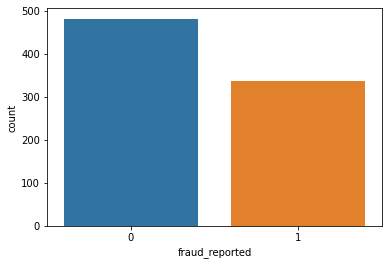

In [17]:
import seaborn as sns
chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported']) # train setindeki fraud dağılımı aşağıdaki gibidir

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

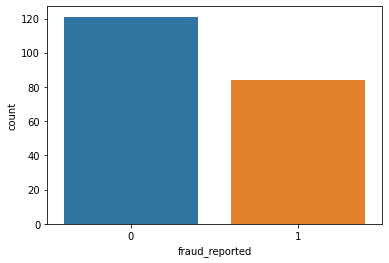

In [18]:
import seaborn as sns
chck = pd.DataFrame()
chck['fraud_reported'] = y_test

sns.countplot(chck['fraud_reported'])  # test setindeki fraud dağılımı aşağıdaki gibidir, trainle benzer oranda bölünmüştür

In [19]:
# train - validation split yapılır

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.8, random_state = 1, stratify = y_train)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

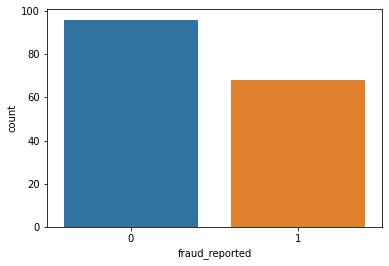

In [20]:
import seaborn as sns
chck = pd.DataFrame()
chck['fraud_reported'] = y_val

sns.countplot(chck['fraud_reported']) 

In [21]:
y_val # validation setindeki y sayısı : 164

421    0
233    1
38     0
830    1
546    0
      ..
909    1
55     0
13     0
259    0
99     0
Name: fraud_reported, Length: 164, dtype: int32

In [22]:
y_train  # train setindeki y sayısı : 654

857    1
607    1
138    0
37     0
204    0
      ..
770    0
477    0
974    1
124    0
529    0
Name: fraud_reported, Length: 654, dtype: int32

In [23]:
y_test   # test setindeki y sayısı : 205

186    0
752    0
865    1
632    0
615    0
      ..
653    0
250    0
426    0
499    0
270    0
Name: fraud_reported, Length: 205, dtype: int32

In [24]:
len(X_over) # train+validation+test = 654+164+205 = 1023, verimizi düzgünce böldük

1023

In [25]:
# Logistic Regression ile model kurma

# training

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

score = lr.score(X_test, y_test)
print(score)

0.8292682926829268


In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       121
           1       0.78      0.81      0.80        84

    accuracy                           0.83       205
   macro avg       0.82      0.83      0.82       205
weighted avg       0.83      0.83      0.83       205



<AxesSubplot:>

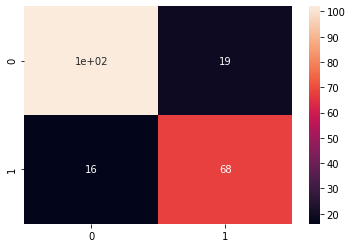

In [27]:
cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

Confusion Matrix'e bakılarak; aslında fraud olmayan 16 case'e fraud demiş, fraud olan 19 case'e ise fraud değil diye sınıflandırmıştır.

In [28]:
# validation

preds = lr.predict(X_val)

score = lr.score(X_val, y_val)
print(score)

0.8170731707317073


In [30]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        96
           1       0.78      0.78      0.78        68

    accuracy                           0.82       164
   macro avg       0.81      0.81      0.81       164
weighted avg       0.82      0.82      0.82       164



<AxesSubplot:>

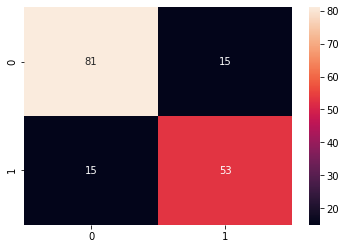

In [32]:
cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

Modelin Fraud'ları (1) tahmin etme doğruluğu test setinde %80'ken validation setinde %78'e düşmüştür.
Modelin genel başarısı test setinde %83 iken validation setinde %82'ye düşmüştür.